# CRO Algorithm examples

## Example I: max_ones problem

[*Running] Initialization:  max


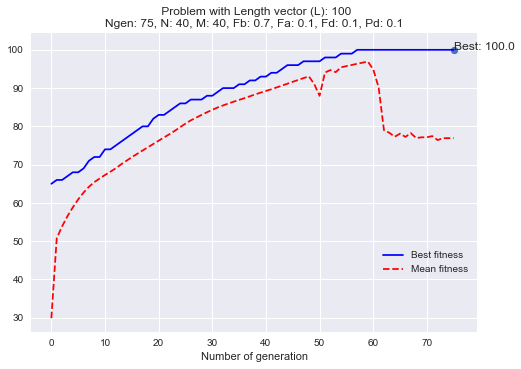

Best coral:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best solution: 100.0
Wall time: 14.8 s


In [1]:
import numpy as np
import seaborn as sns 
from cro import *
from fitness import max_ones

## ------------------------------------------------------
## Parameters initialization
## ------------------------------------------------------
Ngen = 75                  # Number of generations
N  = 40                    # MxN: reef size
M  = 40                    # MxN: reef size
Fb = 0.7                   # Broadcast prob.
Fa = 0.1                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
L = 100
ke = 0.2
## ------------------------------------------------------

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, max_ones, opt, L, verbose=False, ke=ke)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit()

## Example I.2: max problem in a discrete interval


It simulates max_ones problem but in a discrete range of values

[*Running] Initialization:  max


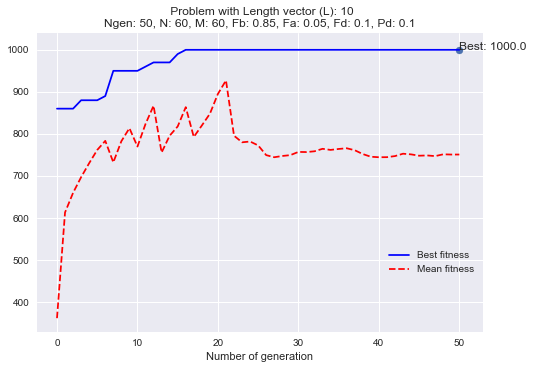

Best coral:  [10 10 10 10 10 10 10 10 10 10]
Best solution: 1000.0
Wall time: 29.8 s


In [2]:
import numpy as np
import seaborn as sns 
from cro import *
from fitness import max_ones

## ------------------------------------------------------
## Parameters initialization
## ------------------------------------------------------
Ngen = 50                  # Number of generations
N  = 60                    # MxN: reef size
M  = 60                    # MxN: reef size
Fb = 0.85                  # Broadcast prob.
Fa = 0.05                  # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
L = 10
ke = 0.2
mode = 'disc'
## ------------------------------------------------------

grid = {'x': [2, 10]}      # Discrete values between 2 and 10

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, max_ones, opt, L, verbose=False, ke=ke, mode=mode, param_grid=grid)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit()

## Example II: feature selection Classification (max auc)

https://www.kaggle.com/primaryobjects/voicegender

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. It contains 20 features and I added 10 noisy!

[*Running] Initialization:  max
Reef initialization: 0.741836734694
Best-fitness: 0.741836734694 
 0.0% completado 

Best-fitness: 0.99645446578 
 50.0% completado 

Best-fitness: 0.999800637959 
 100% completado 



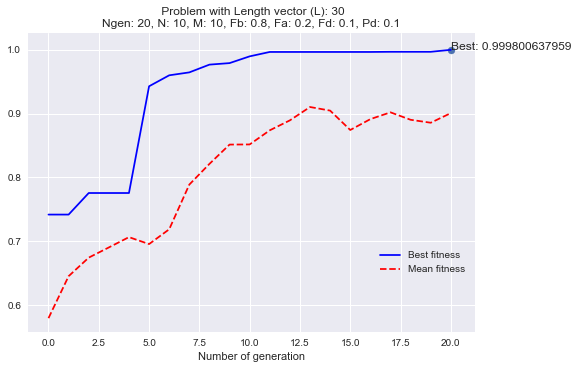

Best coral:  [1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best solution: 0.999800637959
Wall time: 45.6 s
['meanfreq' 'sd' 'median' 'IQR' 'sp.ent' 'sfm' 'mode' 'meanfun' 'maxfun']


In [3]:
from functools import partial
import numpy as np
import seaborn as sns 
from cro import *
from utils import load_data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from fitness import feature_selection

## ------------------------------------------------------
## Parameters initialization
## ------------------------------------------------------
Ngen = 20                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                    # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
## ------------------------------------------------------

dataset = load_data('voice')
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

clf = KNeighborsClassifier(2)

fitness_coral = partial(feature_selection, X=X, y=y, model=clf,
                        get_prediction = lambda clf, X: clf.predict_proba(X)[:, 1], 
                        metric=roc_auc_score)

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, fitness_coral, opt, L, seed=13, verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, clf)

names = np.array(dataset.feature_names)
print(names[REEFpob[ind_best, :]>0])

## Example III: feature selection, regression (min mse)

[*Running] Initialization:  min
Reef initialization: 4.87331488701
Best-fitness: 4.43093135124 
 0.0% completado 

Best-fitness: 2.87149679112 
 40.0% completado 

Best-fitness: 2.87149679112 
 80.0% completado 

Best-fitness: 2.87149679112 
 100% completado 



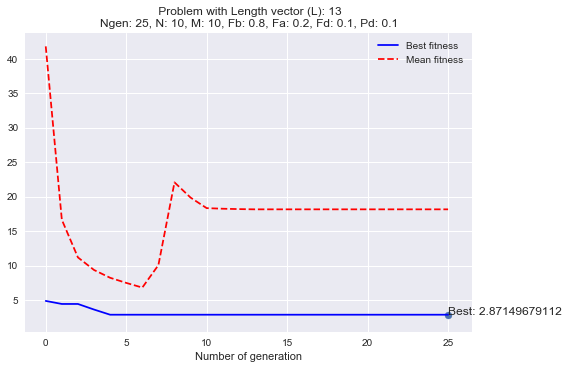

Best coral:  [0 1 1 0 1 1 1 1 0 1 0 1 1]
Best solution: 2.87149679112
Wall time: 1min 53s
['ZN' 'INDUS' 'NOX' 'RM' 'AGE' 'DIS' 'TAX' 'B' 'LSTAT']


In [4]:
import numpy as np
import seaborn as sns 
from sklearn import datasets, ensemble
from sklearn.metrics import r2_score, mean_squared_error   
from cro import *
from fitness import feature_selection

## ------------------------------------------------------
## Parameters initialization
## ------------------------------------------------------
Ngen = 25                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                    # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.7                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'min'                 # flag: 'max' for maximizing and 'min' for minimizing

## ------------------------------------------------------

dataset = datasets.load_boston()
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

params = {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 2}
gbr = ensemble.GradientBoostingRegressor(**params)  

fitness_coral = partial(feature_selection, X=X, y=y, model=gbr,
                        get_prediction=lambda gbr, X: gbr.predict(X), 
                        metric=mean_squared_error)

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, fitness_coral, opt, L, verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, gbr)

names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
print(names[REEFpob[ind_best, :]>0])